<a href="https://colab.research.google.com/github/saragamilmohamed/Vegetables-Classification/blob/main/classification_vegetabels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import glob as gb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras .layers import Dense,Activation,MaxPooling2D,Conv2D,Flatten,Dropout


### Train

In [ ]:
trainPath=r"C:/Users/EL-Huda/Downloads/archive (2)/Vegetable Images/train"

In [ ]:

for folder in  os.listdir(trainPath ) :
    files = gb.glob(pathname= str( trainPath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1000 in folder Bean
For training data , found 1000 in folder Bitter_Gourd
For training data , found 1000 in folder Bottle_Gourd
For training data , found 1000 in folder Brinjal
For training data , found 1000 in folder Broccoli
For training data , found 1000 in folder Cabbage
For training data , found 1000 in folder Capsicum
For training data , found 1000 in folder Carrot
For training data , found 1000 in folder Cauliflower
For training data , found 1000 in folder Cucumber
For training data , found 1000 in folder Papaya
For training data , found 1000 in folder Potato
For training data , found 1000 in folder Pumpkin
For training data , found 1000 in folder Radish
For training data , found 1000 in folder Tomato
For training data , found 0 in folder train - Shortcut.lnk


In [ ]:
size=[]
for folder in  os.listdir(trainPath ) :
    files = gb.glob(pathname= str( trainPath +'/' + folder + '/*.jpg'))
    for file in files:
        img=cv2.imread(file)
        size.append(img.shape)
pd.Series(size).value_counts()

(224, 224, 3)    14994
(211, 224, 3)        1
(200, 224, 3)        1
(193, 224, 3)        1
(198, 224, 3)        1
(210, 224, 3)        1
(205, 224, 3)        1
dtype: int64

In [ ]:
code={}
for num , folder in enumerate(os.listdir(trainPath)):
    code.update({folder:num})

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

print(code)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14, 'train - Shortcut.lnk': 15}


In [ ]:
s=100

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainPath ) :
    files = gb.glob(pathname= str( trainPath +'/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])



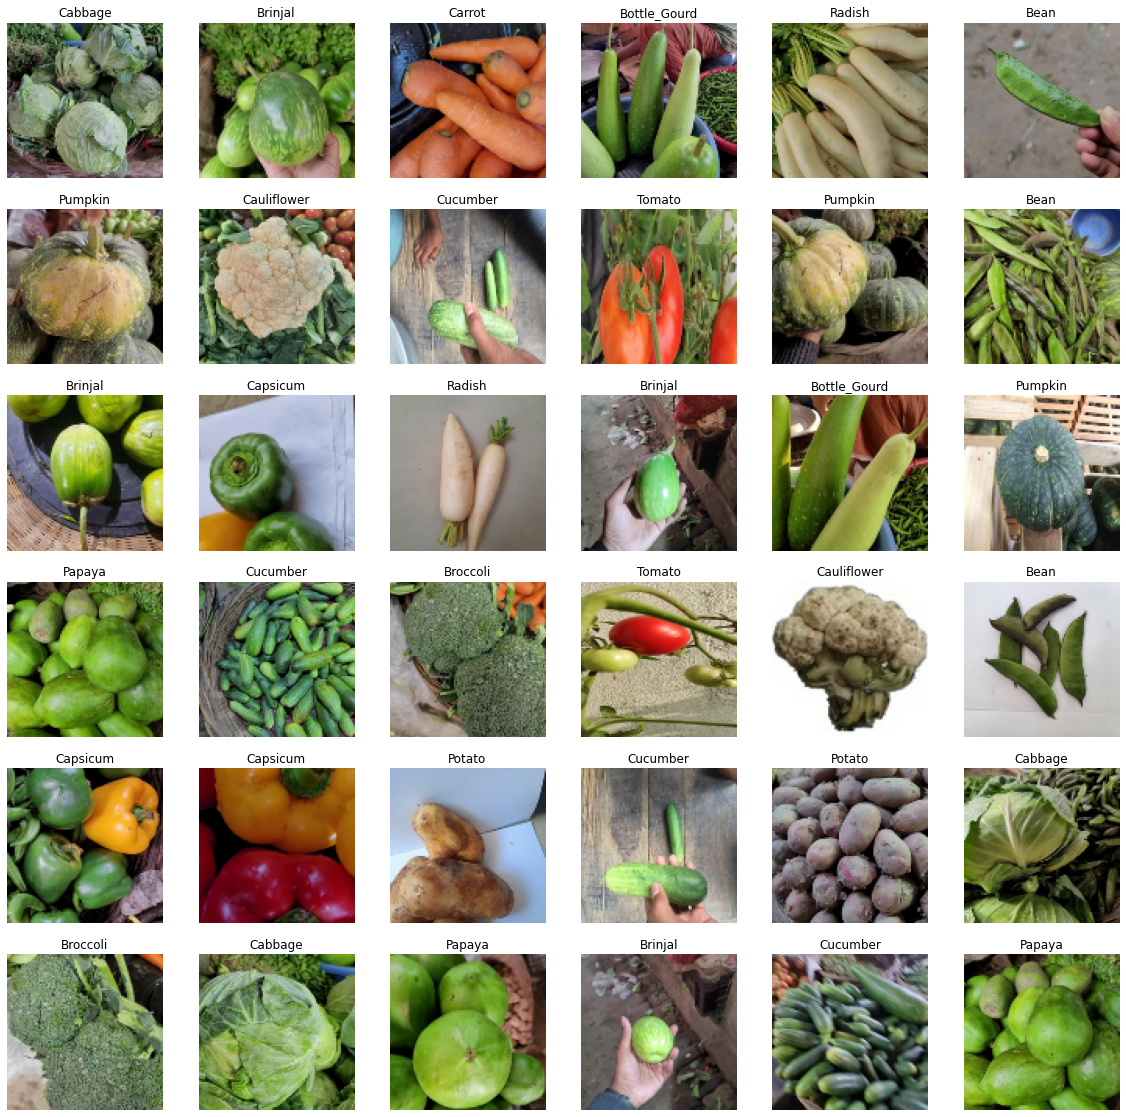

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))



### Test

In [ ]:
testPath=r'C:/Users/EL-Huda/Downloads/archive (2)/Vegetable Images/test'

In [ ]:
for folder in  os.listdir(testPath ) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 200 in folder Bean
For training data , found 200 in folder Bitter_Gourd
For training data , found 200 in folder Bottle_Gourd
For training data , found 200 in folder Brinjal
For training data , found 200 in folder Broccoli
For training data , found 200 in folder Cabbage
For training data , found 200 in folder Capsicum
For training data , found 200 in folder Carrot
For training data , found 200 in folder Cauliflower
For training data , found 200 in folder Cucumber
For training data , found 200 in folder Papaya
For training data , found 200 in folder Potato
For training data , found 200 in folder Pumpkin
For training data , found 200 in folder Radish
For training data , found 200 in folder Tomato


In [ ]:
size=[]
for folder in  os.listdir(testPath ) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.jpg'))
    for file in files:
        img=cv2.imread(file)
        size.append(img.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2999
(207, 224, 3)       1
dtype: int64

In [ ]:
code={}
for num , folder in enumerate(os.listdir(testPath)):
    code.update({folder:num})

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

print(code)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testPath ) :
    files = gb.glob(pathname= str( testPath +'/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

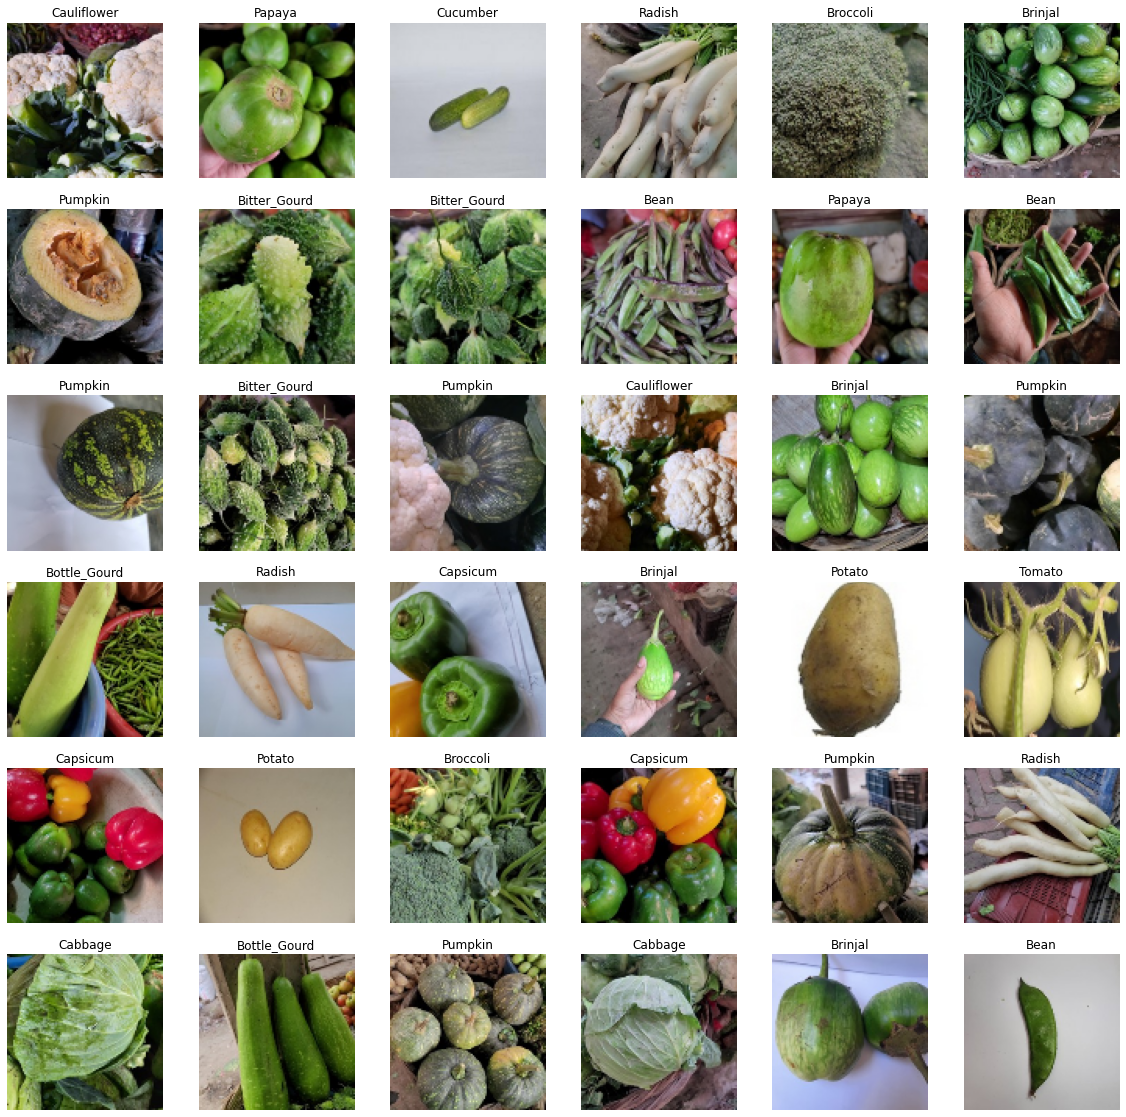

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

### Valid

In [ ]:
validPath=r'C:/Users/EL-Huda/Downloads/archive (2)/Vegetable Images/validation'

In [ ]:
for folder in  os.listdir(validPath ) :
    files = gb.glob(pathname= str( validPath +'/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 200 in folder Bean
For training data , found 200 in folder Bitter_Gourd
For training data , found 200 in folder Bottle_Gourd
For training data , found 200 in folder Brinjal
For training data , found 200 in folder Broccoli
For training data , found 200 in folder Cabbage
For training data , found 200 in folder Capsicum
For training data , found 200 in folder Carrot
For training data , found 200 in folder Cauliflower
For training data , found 200 in folder Cucumber
For training data , found 200 in folder Papaya
For training data , found 200 in folder Potato
For training data , found 200 in folder Pumpkin
For training data , found 200 in folder Radish
For training data , found 200 in folder Tomato


In [ ]:
size=[]
for folder in  os.listdir(validPath ) :
    files = gb.glob(pathname= str( validPath +'/' + folder + '/*.jpg'))
    for file in files:
        img=cv2.imread(file)
        size.append(img.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2998
(223, 224, 3)       1
(187, 224, 3)       1
dtype: int64

In [ ]:
code={}
for num , folder in enumerate(os.listdir(validPath)):
    code.update({folder:num})

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

print(code)

{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}


In [ ]:
X_valid = []
y_valid = []
for folder in  os.listdir(validPath) :
    files = gb.glob(pathname= str( validPath +'/' + folder + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
        image_array = cv2.resize(image , (s,s))
        X_valid.append(list(image_array))
        y_valid.append(code[folder])

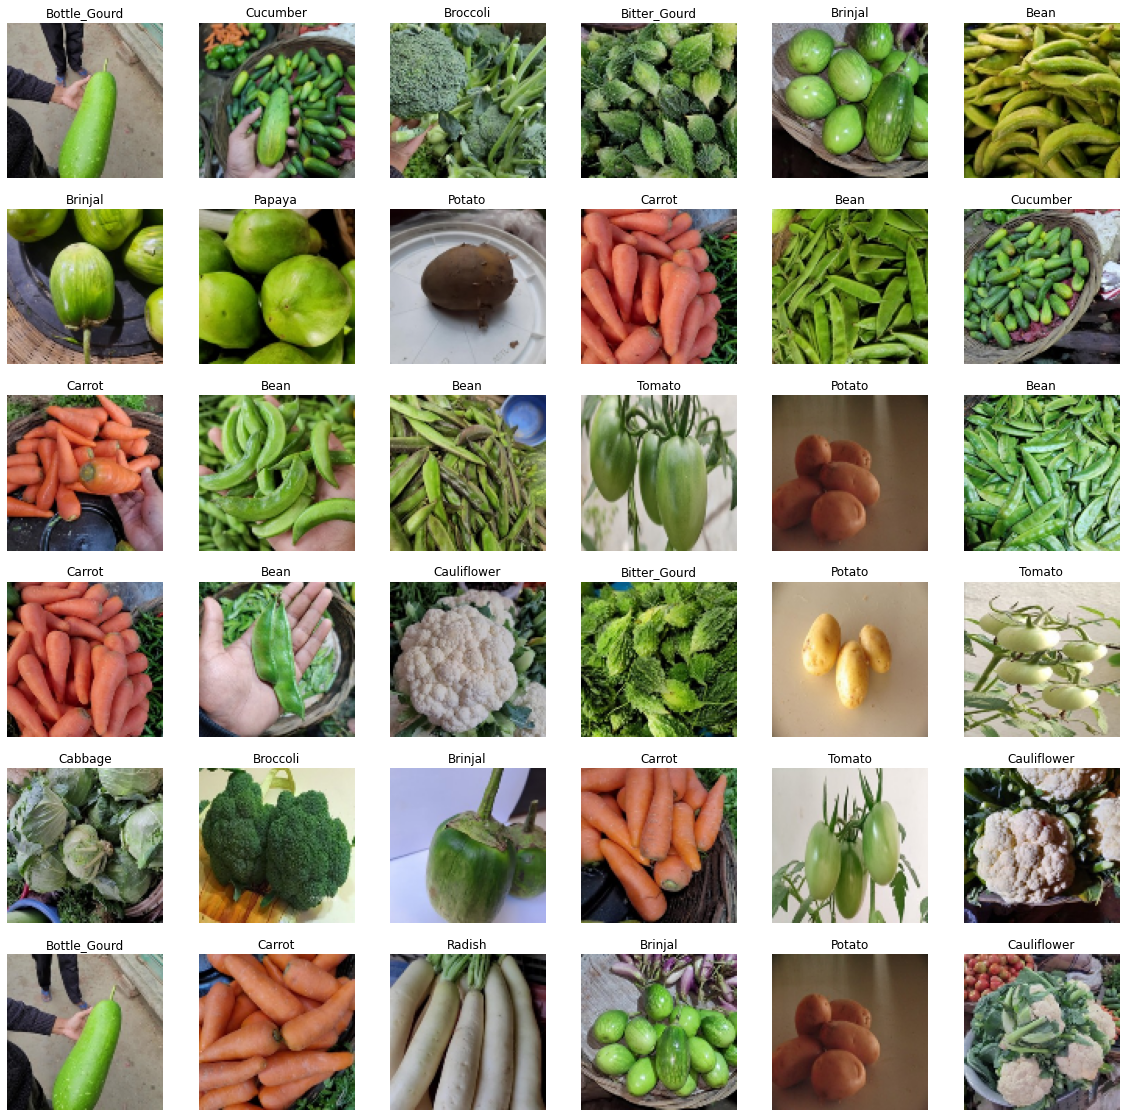

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_valid),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_valid[i])
    plt.axis('off')
    plt.title(getcode(y_valid[i]))

### CNN

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid=np.array(X_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_valid.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


X_train shape  is (15000, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (3000, 100, 100, 3)
y_train shape  is (15000,)
y_test shape  is (3000,)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())
Dropout(0.2)
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
#Dropout(0.2)
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 flatten_6 (Flatten)         (None, 56448)            

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.0001)

In [ ]:

earlystop = EarlyStopping(patience=3)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(X_train)


In [ ]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=64),
                              epochs = 10, validation_data = (X_valid,y_valid),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 64
                              , callbacks=[learning_rate_reduction,earlystop])


Epoch 1/10


KeyboardInterrupt: 

In [ ]:
val_Loss, val_Accuracy = model.evaluate(X_test, y_test)

print('Test Loss is '+str(val_Loss))
print('Test Accuracy is '+str(val_Accuracy ))

94/94 [==============================] - 6s 59ms/step - loss: 4.9047 - accuracy: 0.7003
Test Loss is 4.904667854309082
Test Accuracy is 0.7003333568572998


In [ ]:
https://www.kaggle.com/code/csedsa20bd6718/20bd1a6718-e-bhoomika-cnn-vegetable-dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D())
Dropout(0.2)

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())



model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(15, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 batch_normalization_3 (Batc  (None, 98, 98, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
model.fit(X_train,y_train,epochs=10, callbacks=[early_stop,learning_rate_reduction], batch_size=64,verbose=1)

Epoch 1/20
191/191 [==============================] - 73s 376ms/step - loss: 1.0073 - accuracy: 0.6643 - lr: 0.0010
Epoch 2/20
191/191 [==============================] - 72s 375ms/step - loss: 0.3016 - accuracy: 0.9048 - lr: 0.0010
Epoch 3/20
191/191 [==============================] - 72s 379ms/step - loss: 0.1473 - accuracy: 0.9541 - lr: 0.0010
Epoch 4/20
191/191 [==============================] - 76s 397ms/step - loss: 0.0919 - accuracy: 0.9696 - lr: 0.0010
Epoch 5/20
191/191 [==============================] - 76s 399ms/step - loss: 0.0795 - accuracy: 0.9750 - lr: 0.0010
Epoch 6/20
191/191 [==============================] - 76s 397ms/step - loss: 0.0597 - accuracy: 0.9826 - lr: 0.0010
Epoch 7/20
191/191 [==============================] - 76s 395ms/step - loss: 0.0322 - accuracy: 0.9904 - lr: 0.0010
Epoch 8/20
191/191 [==============================] - 75s 391ms/step - loss: 0.0560 - accuracy: 0.9830 - lr: 0.0010
Epoch 9/20
191/191 [==============================] - 78s 409ms/step - l